In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
#Loding important libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Data Loading**

In [3]:
# Load the training and testing datasets
train_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv') #Training data
test_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv') #Testing data

# Display basic info about the datasets
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# Show the first few rows of the training data
train_df.head()

Train Data Shape: (1296675, 23)
Test Data Shape: (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Check for duplicate transactions
duplicate_rows = train_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

Missing values in each column:
 Series([], dtype: int64)

Number of duplicate rows: 0


# Data Exploration and Visualisation

In [5]:
# Display statistical summary of numerical columns
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


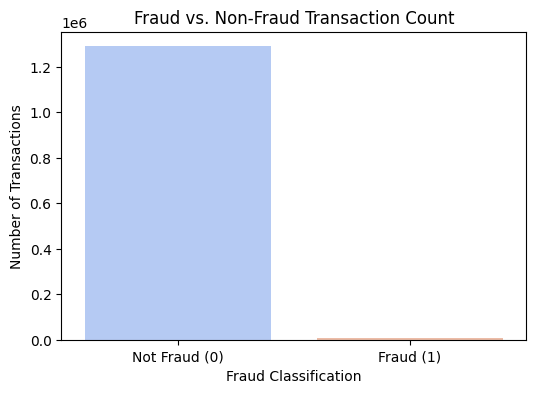

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [6]:
# Check fraud distribution
fraud_counts = train_df['is_fraud'].value_counts()

# Plot the fraud distribution
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Not Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.xlabel('Fraud Classification')
plt.title('Fraud vs. Non-Fraud Transaction Count')
plt.show()

# Print class distribution
print(fraud_counts)

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop unnecessary columns (modify based on your dataset)
drop_columns = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num']
train_df = train_df.drop(columns=drop_columns, errors='ignore')

# Convert categorical columns using Label Encoding
categorical_cols = ['merchant', 'category', 'gender']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le  # Save encoders for later use on test data

# Normalize numerical columns
scaler = StandardScaler()
numeric_cols = ['amt', 'lat', 'long']
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Display processed data
print("Processed Training Data Shape:", train_df.shape)
print(train_df.head())

Processed Training Data Shape: (1296675, 12)
  trans_date_trans_time  merchant  category       amt  gender       lat  \
0   2019-01-01 00:00:18       514         8 -0.407826       0 -0.484420   
1   2019-01-01 00:00:44       241         4  0.230039       0  2.039120   
2   2019-01-01 00:00:51       390         0  0.934149       1  0.717754   
3   2019-01-01 00:01:16       360         2 -0.158132       1  1.515617   
4   2019-01-01 00:03:06       297         9 -0.177094       1 -0.023035   

       long  city_pop   unix_time  merch_lat  merch_long  is_fraud  
0  0.657620      3495  1325376018  36.011293  -82.048315         0  
1 -2.033870       149  1325376044  49.159047 -118.186462         0  
2 -1.601537      4154  1325376051  43.150704 -112.154481         0  
3 -1.590766      1939  1325376076  47.034331 -112.561071         0  
4  0.782279        99  1325376186  38.674999  -78.632459         0  


# **Data Preprocessing**

In [8]:
# Adjust fraud and normal sample sizes
fraud_df = train_df[train_df["is_fraud"] == 1]
normal_df = train_df[train_df["is_fraud"] == 0]

# Resample to 15,000 fraud cases and 20,000 normal cases
fraud_sampled = fraud_df.sample(n=15000, replace=True, random_state=42)  # Oversampling if needed
normal_sampled = normal_df.sample(n=20000, replace=True, random_state=42)  # Undersampling if needed

# Combine sampled data
train_df = pd.concat([fraud_sampled, normal_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
print(train_df["is_fraud"].value_counts())

is_fraud
0    20000
1    15000
Name: count, dtype: int64


# **Deep Learning Models**

### Sequential model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Ensure train_df exists
if 'train_df' not in locals():
    raise ValueError("train_df is not defined. Please ensure your dataset is loaded.")

# Identify non-numeric columns
non_numeric_cols = train_df.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_cols}")

# Handle datetime columns
if 'transaction_date' in train_df.columns:  # Change column name as per your dataset
    train_df['transaction_timestamp'] = pd.to_datetime(train_df['transaction_date']).astype(int) // 10**9
    train_df.drop(columns=['transaction_date'], inplace=True)

# Handle categorical columns (convert to numerical)
label_encoders = {}
for col in non_numeric_cols:
    if col != "is_fraud" and col != "transaction_date":  # Exclude target and datetime column
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col].astype(str))
        label_encoders[col] = le

# Define X and y
X = train_df.drop(columns=["is_fraud"])
y = train_df["is_fraud"].values  # Ensure y is a NumPy array

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float32))  # Convert to float32 to save memory

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Compute Class Weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# Increase fraud weight slightly to improve recall
class_weight_dict[1] *= 1.2

# Build Deep Learning Model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # Reduced neurons
    Dropout(0.2),  # Adjusted dropout
    Dense(32, activation="relu"),
    Dropout(0.1),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test),  
                    class_weight=class_weight_dict, callbacks=[early_stopping])

# Evaluate Model
eval_results = model.evaluate(X_test, y_test)

Non-numeric columns: ['trans_date_trans_time']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7917 - loss: 0.5197 - val_accuracy: 0.8790 - val_loss: 0.3406
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 0.3884 - val_accuracy: 0.8894 - val_loss: 0.3054
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8878 - loss: 0.3615 - val_accuracy: 0.8983 - val_loss: 0.2840
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8948 - loss: 0.3320 - val_accuracy: 0.9010 - val_loss: 0.2526
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9047 - loss: 0.2991 - val_accuracy: 0.9197 - val_loss: 0.2414
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 0.2836 - val_accuracy: 0.9251 - val_loss: 0.2272
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9144 - loss: 0.2698 - val_accuracy: 0.9287 - val_loss: 0.2015
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9129 - loss: 0.2604 - 

In [10]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = (model.predict(X_test) > 0.4).astype(int) # Convert probabilities to binary values

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Normal (0)", "Fraud (1)"])
print(report)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

  Normal (0)       0.92      0.97      0.94      4000
   Fraud (1)       0.96      0.89      0.92      3000

    accuracy                           0.94      7000
   macro avg       0.94      0.93      0.93      7000
weighted avg       0.94      0.94      0.93      7000



### LSTM

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Use preprocessed train_df

# Define X and y
X = train_df.drop(columns=["is_fraud"])
y = train_df["is_fraud"].values  # Ensure y is a NumPy array

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float32))  # Convert to float32 to save memory

# Reshape for LSTM (samples, timesteps, features) - Using 1 timestep as transactions are independent
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)

# Compute Class Weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weight_dict, callbacks=[early_stopping])

# Evaluate Model
eval_results = model.evaluate(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7907 - loss: 0.4878 - val_accuracy: 0.8823 - val_loss: 0.3283
Epoch 2/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8678 - loss: 0.3624 - val_accuracy: 0.8791 - val_loss: 0.3007
Epoch 3/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8743 - loss: 0.3332 - val_accuracy: 0.9017 - val_loss: 0.2895
Epoch 4/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8793 - loss: 0.3152 - val_accuracy: 0.9096 - val_loss: 0.2613
Epoch 5/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8843 - loss: 0.3102 - val_accuracy: 0.9079 - val_loss: 0.2433
Epoch 6/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8916 - loss: 0.2914 - val_accuracy: 0.9137 - val_loss: 0.2327
Epoch 7/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9008 - loss: 0.2744 - val_accuracy: 0.9243 - val_loss: 0.2152
Epoch 8/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9089 - loss: 0.2569 - val_accuracy: 0

In [12]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.4).astype(int) # Convert probabilities to binary labels

# Print classification report
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Fraud (1)"]))

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

  Normal (0)       0.93      0.96      0.94      4000
   Fraud (1)       0.95      0.90      0.92      3000

    accuracy                           0.93      7000
   macro avg       0.94      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000



# **ML Models**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Load dataset (Assuming train_df is preprocessed)
X = train_df.drop(columns=["is_fraud"])
y = train_df["is_fraud"].values

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float32))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}\n")

### Logistic Regression

In [14]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.8664
Precision: 0.9488
Recall: 0.7318
F1 Score: 0.8263
AUC-ROC: 0.8485



In [15]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Generate predictions
y_pred = log_reg.predict(X_test)

# Get classification report for both classes
report = classification_report(y_test, y_pred, target_names=["Normal", "Fraud"])
print("LogisticRegression:\n", report)

LogisticRegression:
               precision    recall  f1-score   support

      Normal       0.82      0.97      0.89      3961
       Fraud       0.95      0.73      0.83      3039

    accuracy                           0.87      7000
   macro avg       0.89      0.85      0.86      7000
weighted avg       0.88      0.87      0.86      7000



### Decision Tree

In [16]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
evaluate_model(decision_tree, X_test, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.9787
Precision: 0.9685
Recall: 0.9829
F1 Score: 0.9757
AUC-ROC: 0.9792



In [17]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Generate predictions
y_pred = dt.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, target_names=["Normal", "Fraud"])
print("Decision Tree:\n", report)

Decision Tree:
               precision    recall  f1-score   support

      Normal       0.99      0.97      0.98      3961
       Fraud       0.97      0.98      0.97      3039

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



### Random Forest

In [18]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 0.9826
Precision: 0.9799
Recall: 0.9799
F1 Score: 0.9799
AUC-ROC: 0.9982



In [19]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Generate predictions
y_pred = rf.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, target_names=["Normal", "Fraud"])
print("Random Forest:\n", report)

Random Forest:
               precision    recall  f1-score   support

      Normal       0.99      0.98      0.99      3961
       Fraud       0.98      0.98      0.98      3039

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



### SVM

In [20]:
# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test)

Model: SVC
Accuracy: 0.8763
Precision: 0.9673
Recall: 0.7400
F1 Score: 0.8386
AUC-ROC: 0.8441



In [21]:
# Train SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# Generate predictions
y_pred = svm.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, target_names=["Normal", "Fraud"])
print("SVM:\n", report)

SVM:
               precision    recall  f1-score   support

      Normal       0.83      0.98      0.90      3961
       Fraud       0.97      0.74      0.84      3039

    accuracy                           0.88      7000
   macro avg       0.90      0.86      0.87      7000
weighted avg       0.89      0.88      0.87      7000



### KNN

In [22]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

Model: KNeighborsClassifier
Accuracy: 0.8766
Precision: 0.8655
Recall: 0.8473
F1 Score: 0.8563
AUC-ROC: 0.9440



In [23]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Generate predictions
y_pred = knn.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, target_names=["Normal", "Fraud"])
print("KNN:\n", report)

KNN:
               precision    recall  f1-score   support

      Normal       0.88      0.90      0.89      3961
       Fraud       0.87      0.85      0.86      3039

    accuracy                           0.88      7000
   macro avg       0.88      0.87      0.87      7000
weighted avg       0.88      0.88      0.88      7000



### XGBoost

In [24]:
# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
evaluate_model(xgboost, X_test, y_test)

Model: XGBClassifier
Accuracy: 0.9809
Precision: 0.9702
Recall: 0.9862
F1 Score: 0.9781
AUC-ROC: 0.9972



In [25]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Generate predictions
y_pred = xgb.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, target_names=["Normal", "Fraud"])
print("XGBoost:\n", report)

XGBoost:
               precision    recall  f1-score   support

      Normal       0.99      0.98      0.98      3961
       Fraud       0.97      0.99      0.98      3039

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



# **Model Performance Comparision**

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    metrics = {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }
    return metrics

models = [log_reg, dt, rf, svm, knn, xgb]
results = [evaluate_model(model, X_test, y_test) for model in models]

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

<Figure size 1200x600 with 0 Axes>

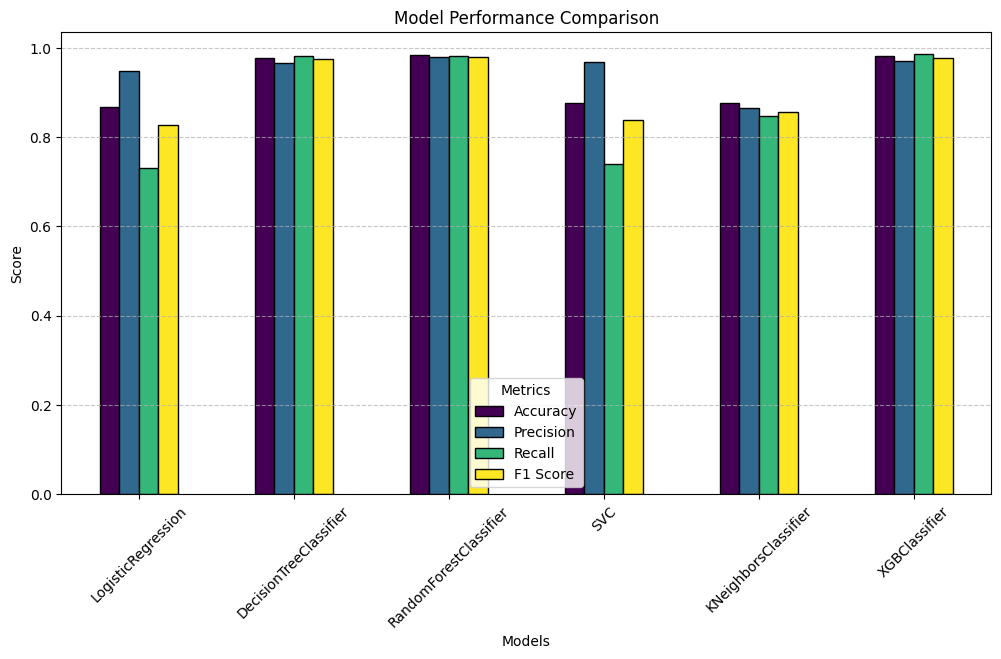

In [27]:
def plot_metrics_bar(results_df):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    
    # Set figure size
    plt.figure(figsize=(12, 6))
    
    # Plot grouped bar chart
    results_df.set_index("Model")[metrics].plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.title("Model Performance Comparison")
    plt.xticks(rotation=45)
    plt.legend(title="Metrics")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

# Plot the results
plot_metrics_bar(results_df)